In [1]:
from Experiment.experiment import Experiment
import matplotlib.pyplot as plt
import numpy as np

In [2]:
directory = '/home/georgeos/Storage/Dropbox/Dropbox (Cambridge University)/Nikon Nd2 Backup_Bakshi-Lab/sb2330/20220331/tna_GFP_SB6_exit/'
my_experiment = Experiment(directory)
print(my_experiment)
my_experiment.registration_channel = "PC"
my_experiment.get_mean_images(rotation=-1)
if not my_experiment.is_registered:
    my_experiment.register_experiment(force=False, n_jobs = -1);


            Experiment name: tna_GFP_SB6_exit
            Channels: ['Green', 'PC', 'Red', 'YFP']
            Timepoints: 55
            FOVs: 10
            Registered: True
        
Mean images for 10 FOVs with rotation of -1 deg calculated, use the mean_images method to return a dict of mean images


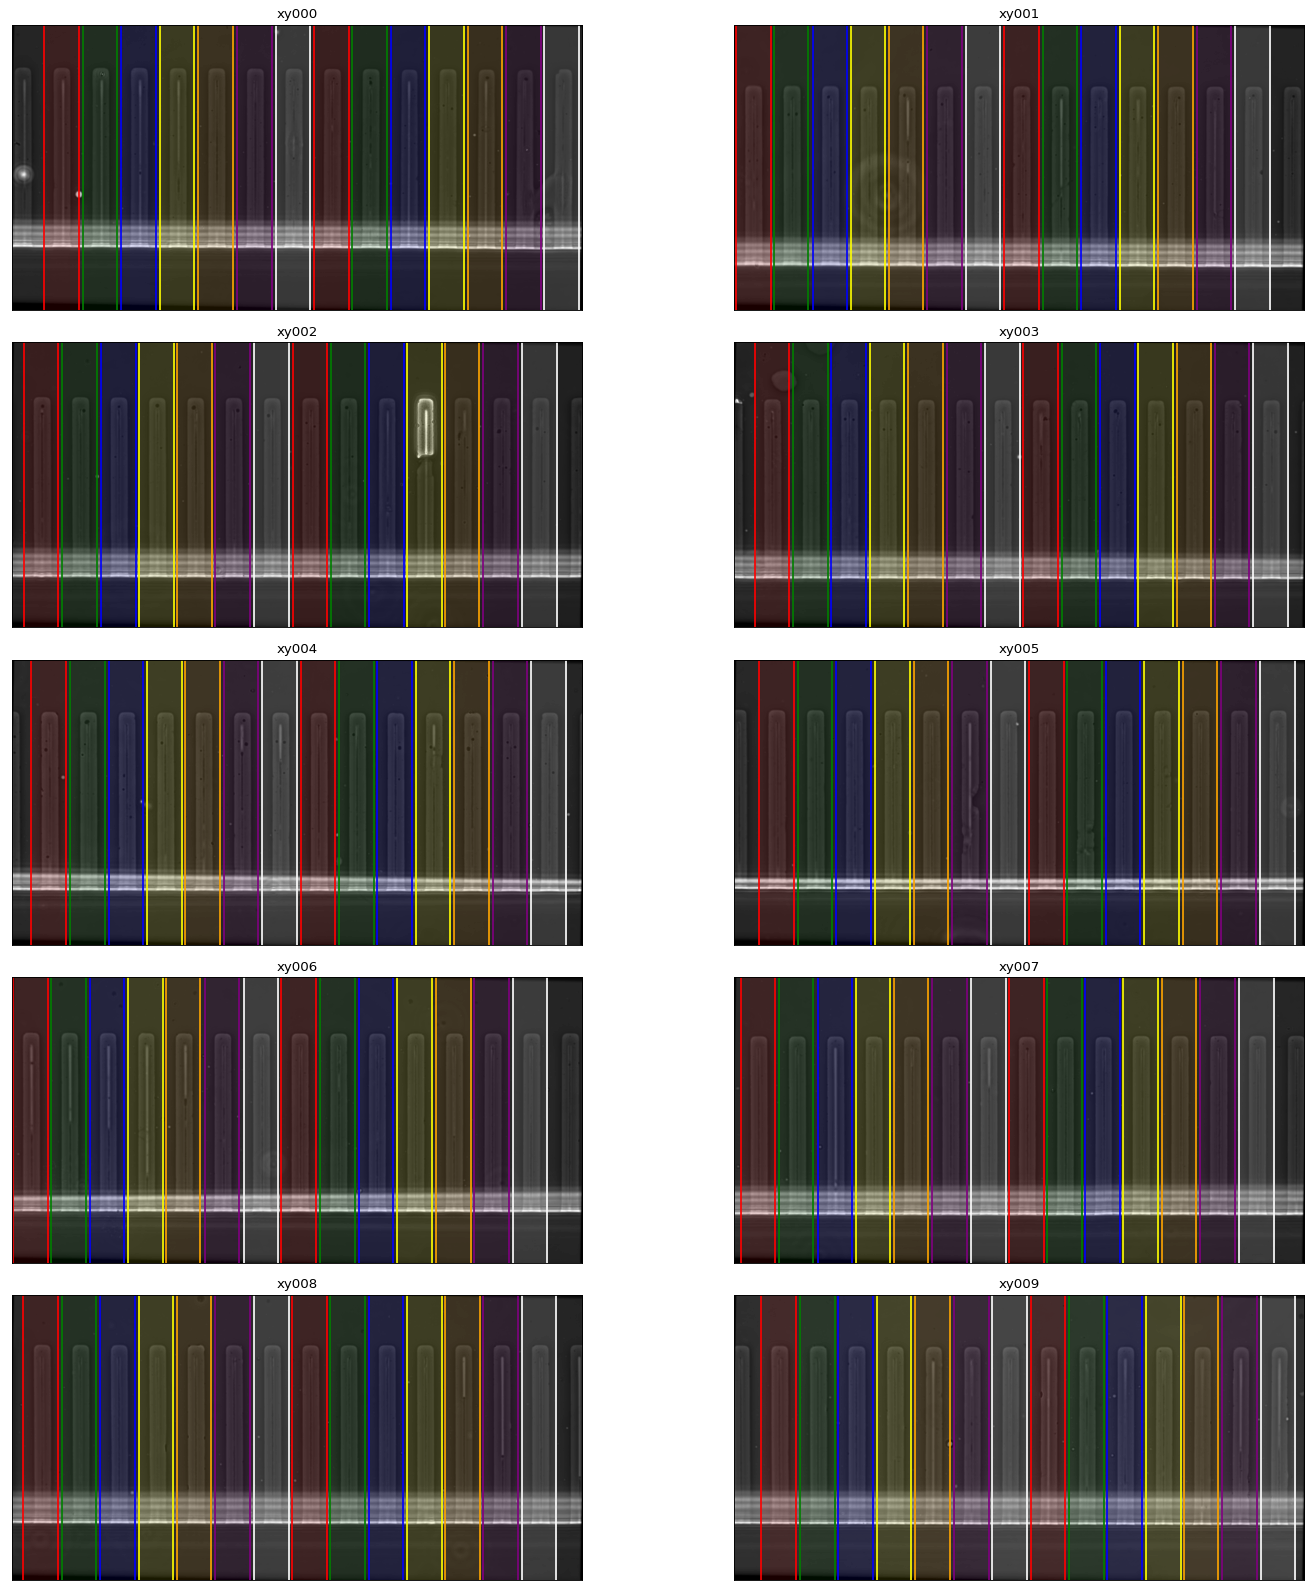

{'xy000': [(130, 270),
  (285, 425),
  (441, 581),
  (597, 737),
  (753, 893),
  (909, 1049),
  (1065, 1205),
  (1220, 1360),
  (1375, 1515),
  (1531, 1671),
  (1686, 1826),
  (1842, 1982),
  (1997, 2137),
  (2151, 2291)],
 'xy001': [(6, 146),
  (159, 299),
  (316, 456),
  (470, 610),
  (624, 764),
  (779, 919),
  (934, 1074),
  (1090, 1230),
  (1246, 1386),
  (1401, 1541),
  (1557, 1697),
  (1713, 1853),
  (1868, 2008),
  (2025, 2165)],
 'xy002': [(47, 187),
  (204, 344),
  (360, 500),
  (513, 653),
  (668, 808),
  (822, 962),
  (979, 1119),
  (1134, 1274),
  (1288, 1428),
  (1444, 1584),
  (1598, 1738),
  (1748, 1888),
  (1905, 2045),
  (2062, 2202)],
 'xy003': [(82, 222),
  (238, 378),
  (392, 532),
  (547, 687),
  (702, 842),
  (858, 998),
  (1013, 1153),
  (1167, 1307),
  (1323, 1463),
  (1477, 1617),
  (1632, 1772),
  (1787, 1927),
  (1941, 2081),
  (2097, 2237)],
 'xy004': [(78, 218),
  (235, 375),
  (391, 531),
  (545, 685),
  (699, 839),
  (856, 996),
  (1012, 1152),
  (1167, 

In [3]:
my_experiment.find_all_trench_positions("PC", sigma = 30, distance = 90, plot = True)

In [30]:
peaks = [my_experiment.find_trench_peaks(FOV, "PC", 30, 140, plot=False)[1] for FOV in my_experiment.FOVs]
my_experiment.trench_spacing = np.mean([np.mean(np.diff(x)) for x in peaks])
my_experiment.peaks = peaks
experiment_trench_x_lims = [
    zip(FOV_peaks - round(my_experiment.trench_spacing / 2.2), FOV_peaks + round(my_experiment.trench_spacing / 2.2)) for FOV_peaks in peaks
]

In [31]:
pruned_experiment_trench_x_lims = []
for trench_x_lims in experiment_trench_x_lims:
    _trench_x_lims = []
    for L, R in trench_x_lims:
        print(L, R)
        if L < 0 or R > my_experiment.dims[1]:
            pass
        else:
            _trench_x_lims.append((L,R))
    pruned_experiment_trench_x_lims.append(_trench_x_lims)

-25 115
130 270
285 425
441 581
597 737
753 893
909 1049
1065 1205
1220 1360
1375 1515
1531 1671
1686 1826
1842 1982
1997 2137
2151 2291
6 146
159 299
316 456
470 610
624 764
779 919
934 1074
1090 1230
1246 1386
1401 1541
1557 1697
1713 1853
1868 2008
2025 2165
2170 2310
47 187
204 344
360 500
513 653
668 808
822 962
979 1119
1134 1274
1288 1428
1444 1584
1598 1738
1748 1888
1905 2045
2062 2202
82 222
238 378
392 532
547 687
702 842
858 998
1013 1153
1167 1307
1323 1463
1477 1617
1632 1772
1787 1927
1941 2081
2097 2237
78 218
235 375
391 531
545 685
699 839
856 996
1012 1152
1167 1307
1322 1462
1477 1617
1632 1772
1787 1927
1942 2082
2097 2237
-60 80
99 239
256 396
412 552
568 708
724 864
879 1019
1035 1175
1191 1331
1346 1486
1501 1641
1656 1796
1811 1951
1966 2106
2124 2264
5 145
158 298
314 454
469 609
621 761
778 918
936 1076
1089 1229
1245 1385
1401 1541
1557 1697
1713 1853
1868 2008
2024 2164
2169 2309
25 165
179 319
336 476
490 630
644 784
800 940
956 1096
1110 1250
1263 1403
14

In [35]:
peaks = {FOV: my_experiment.find_trench_peaks(FOV, "PC", 30, 90, plot=False)[1] for FOV in my_experiment.FOVs}

In [39]:
trench_spacing = np.mean([np.mean(np.diff(peaks[FOV])) for FOV in my_experiment.FOVs])

In [43]:
experiment_trench_x_lims = {FOV:
    zip(peaks[FOV] - round(my_experiment.trench_spacing / 2.2), peaks[FOV] + round(my_experiment.trench_spacing / 2.2)) for FOV in my_experiment.FOVs
}

In [44]:
experiment_trench_x_lims

{'xy000': <zip at 0x7f53e7c4bcc0>,
 'xy001': <zip at 0x7f53e4f0be40>,
 'xy002': <zip at 0x7f53e51dd5c0>,
 'xy003': <zip at 0x7f53e51de200>,
 'xy004': <zip at 0x7f53e516a040>,
 'xy005': <zip at 0x7f53e45d32c0>,
 'xy006': <zip at 0x7f53e53d28c0>,
 'xy007': <zip at 0x7f53e4d7b580>,
 'xy008': <zip at 0x7f53e45d0ec0>,
 'xy009': <zip at 0x7f53e45d3480>}

In [4]:
from itertools import cycle

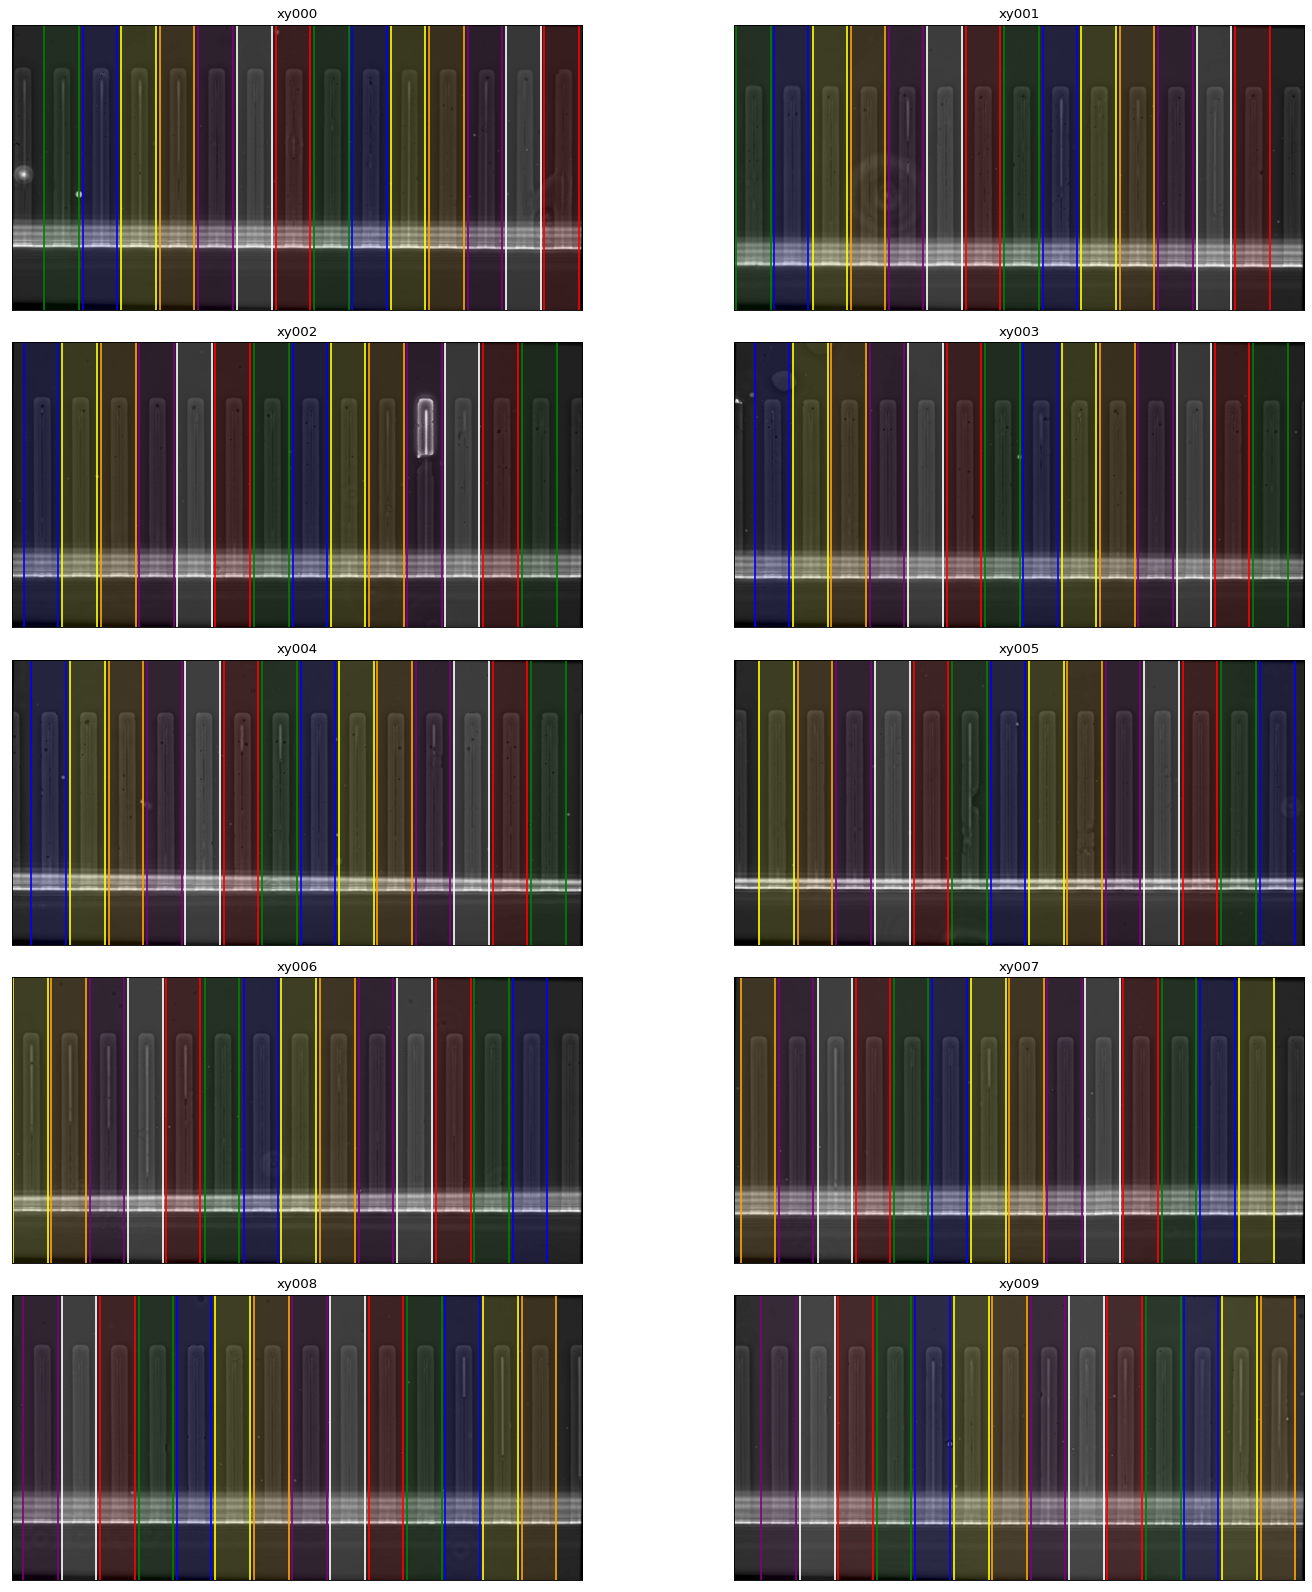

In [10]:
def get_experiment_trench_xlims():
    experiment_trench_x_lims = [zip(FOV_peaks-round(trench_spacing/2.2), FOV_peaks+round(trench_spacing/2.2)) for FOV_peaks in peaks]

    subplots = my_experiment.num_FOVs
    cols = 2
    rows = round(np.ceil(subplots/cols))
    fig, axes = plt.subplots(nrows = rows, ncols = cols, dpi=80, figsize=(20,20))
    color_cycler = cycle(["red","green", "blue", "yellow", "orange", "purple", "white"])
    for ax, FOV, trench_x_lims in zip(axes.flatten(), my_experiment.FOVs, experiment_trench_x_lims):
        mean_img = my_experiment.get_mean_of_timestack(FOV, my_experiment.registration_channel)
        ax.imshow(mean_img,cmap="Greys_r")
        ax.get_xaxis().set_ticks([])
        ax.get_yaxis().set_ticks([])
        ax.set_title(FOV)
        ax.autoscale(enable=True)
        for (L, R), color in zip(trench_x_lims, color_cycler):
            if L < 0 or R > my_experiment.dims[1]:
                pass
            else:
                ax.axvspan(L, R, alpha=0.1, color=color)
                ax.axvline(x=L, color=color)
                ax.axvline(x=R, color = color)
    plt.tight_layout()
    plt.show()